    price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  500000  2000         3          2        2      yes        no      yes   
1  600000  2500         4          3        2      yes       yes       no   
2  550000  1800         3          2        1       no        no       no   
3  700000  3000         4          3        2      yes       yes      yes   
4  800000  3200         5          4        3      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        1      yes        furnished  
1              no              no        2       no   semi-furnished  
2              no              no        1       no      unfurnished  
3             yes             yes        2      yes        furnished  
4             yes             yes        3      yes   semi-furnished  
    price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  500000  2000         3      

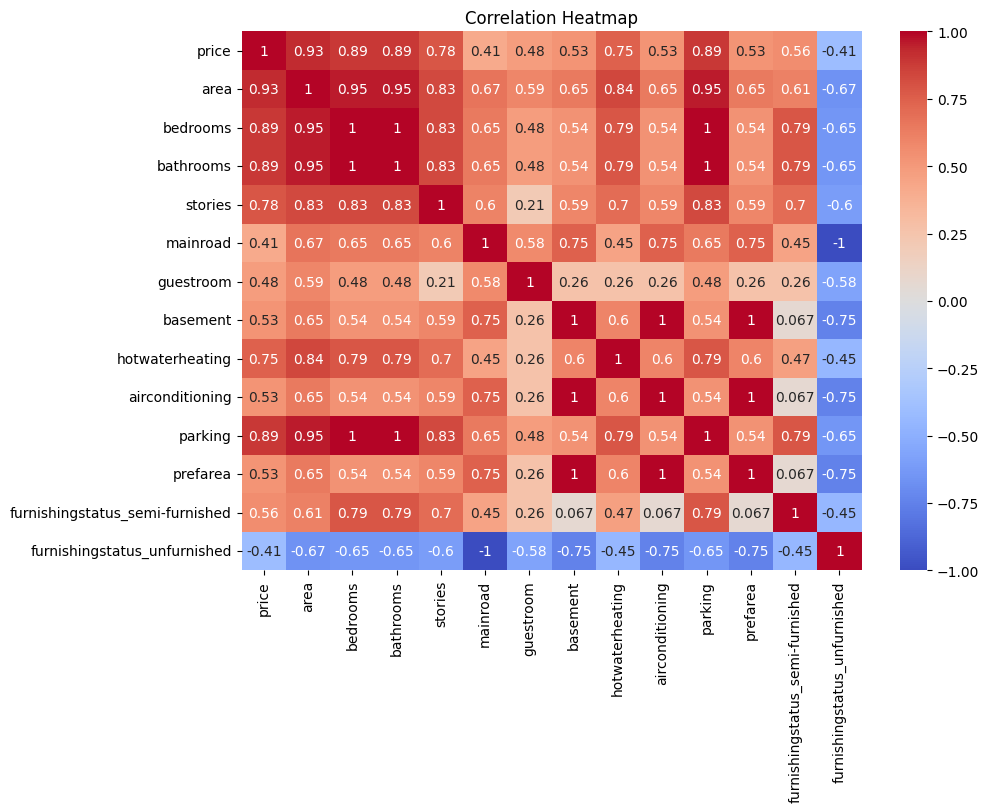

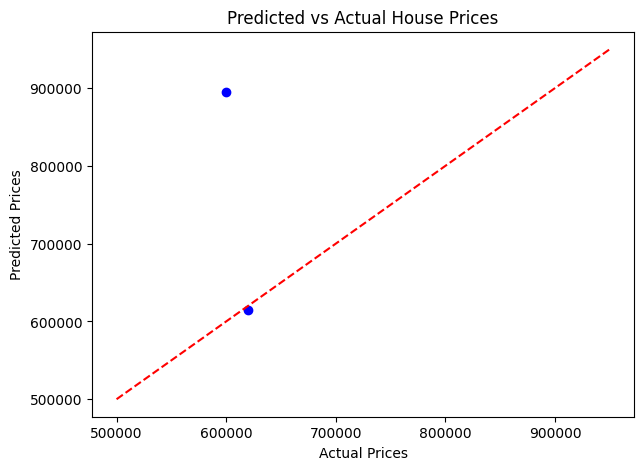


Predicted price for the given house: $694285.86


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
# Agar dataset CSV fayl ko‘rinishida bo‘lmasa, o‘zimiz kichkina namunaviy dataset tuzamiz:
data = pd.DataFrame({
    "price": [500000, 600000, 550000, 700000, 800000, 620000, 750000, 950000],
    "area": [2000, 2500, 1800, 3000, 3200, 2100, 2800, 3500],
    "bedrooms": [3, 4, 3, 4, 5, 3, 4, 5],
    "bathrooms": [2, 3, 2, 3, 4, 2, 3, 4],
    "stories": [2, 2, 1, 2, 3, 2, 2, 3],
    "mainroad": ["yes","yes","no","yes","yes","no","yes","yes"],
    "guestroom": ["no","yes","no","yes","no","no","yes","yes"],
    "basement": ["yes","no","no","yes","yes","no","yes","yes"],
    "hotwaterheating": ["no","no","no","yes","yes","no","no","yes"],
    "airconditioning": ["yes","no","no","yes","yes","no","yes","yes"],
    "parking": [1,2,1,2,3,1,2,3],
    "prefarea": ["yes","no","no","yes","yes","no","yes","yes"],
    "furnishingstatus": ["furnished","semi-furnished","unfurnished","furnished",
                         "semi-furnished","unfurnished","furnished","semi-furnished"]
})

print(data.head())

# Preprocessing
# Binary categorical variables: yes->1, no->0
binary_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
for col in binary_cols:
    data[col] = data[col].map({"yes":1,"no":0})

# Furnishingstatus -> one-hot encoding
data = pd.get_dummies(data, columns=["furnishingstatus"], drop_first=True)

print(data.head())

# Check missing values
print(data.isnull().sum())

# 4. Feature-target split
X = data.drop("price", axis=1)
y = data["price"]

#  Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)
print(f"Intercept: {model.intercept_}")

#  Predictions
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()

house_features = pd.DataFrame({
    "area":[2400],
    "bedrooms":[4],
    "bathrooms":[3],
    "stories":[2],
    "mainroad":[1],
    "guestroom":[0],
    "basement":[1],
    "hotwaterheating":[0],
    "airconditioning":[1],
    "parking":[2],
    "prefarea":[1],
    "furnishingstatus_semi-furnished":[1],
    "furnishingstatus_unfurnished":[0]
})

house_features_scaled = scaler.transform(house_features)
predicted_price = model.predict(house_features_scaled)

print(f"\nPredicted price for the given house: ${predicted_price[0]:.2f}")
